### 函数

#### 共轭梯度法

In [49]:
using Gadfly

In [50]:
norm(x) = sqrt(x'*x)

norm (generic function with 1 method)

In [51]:
function ConjugateGradientFSO(f, g, h, x0; 
        ϵx = 0.01, # precision for step size
        ϵf = 0.01, 
        ϵg = 0.01, 
        debug = false)
    #check arguments
    n, m = size(h)
    if n ≠ m
        error("ERROR: Matrix H is not square!")
    end
    steps = []
    maxIterations = n
    xk = x0
    fk = f(xk...)
    gk = g(xk...)
    dk = -gk
    dh = dk'*h*dk
    α =  -dk'*gk/dh
    δ =  α .*dk
    #xn = xk .+ δ
    #fn = f(xn...)
    #gn = g(xn...)
    push!(steps, xk)
    if (norm(gk) <= ϵg)
        println("Convergence is reached after 1 iteration.")
        return steps
    end
    for i in 1:maxIterations
        # iteration
        xn = xk .+ δ
        push!(steps, xn)
        fn = f(xn...)
        gn = g(xn...)
        βn = dk'*h*gn/dh
        dn = -gn .+ βn.*dk
        dh = dn'*h*dn
        α  = -dn'*gn/dh
        δ  = α.*dn       
        # convegence?
        if (norm(gn) <= ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return  steps  #xn, fn, gn,
        end
        xk = xn
        fk = fn
        dk = dn
        if debug
            println("i=",i," x=", xn, " α=", α, " β=", βn, " gn=", gn, " d=", dn, " δ= ",δ)
        end
    end
    #println("WARN:", maxIterations, " iterations have been exceeded!")
end

ConjugateGradientFSO (generic function with 1 method)

#### 牛顿法

In [52]:
function newton(f, g, h, x0; 
        ϵx = 0.01, # precision for step size
        ϵf = 0.01, 
        ϵg = 0.01, 
        maxIterations = 128,
        debug = false) 
    
    xk = x0
    fk = f(xk...)
    steps = []
    h = h(xk...)

    for i in 1:maxIterations
        # iteration
        #d =-g(xk...)
        #α = d'*d/(d'*h*d)
        #δ = α*d
        xn = xk .- h^(-1)*g(xk...)
        
        fn = f(xn...)
        
        # convegence?
        if (abs(fn-fk) <= ϵf)
            println("Convergence is reached after ", i, " iterations.")
            push!(steps,xn)
            return steps
        end
        x1=push!(steps,xk)     
        if debug
            println("i=",i," xk=", xk,)
        end
        xk = xn
        fk = fn
    end
    println("WARN:", maxIterations, " iterations have been exceeded!")
    #return N
end

newton (generic function with 1 method)

#### 最速下降法

In [53]:
function search_for_alpha(f, xk, fk, d, g; α0 = 100, ϵ = 0.5, τ = 0.5)
    α = α0
    ϕ0 = d'*g
    while f((xk .+ α*d)...) > fk + ϵ*α*ϕ0
        α = τ*α
    end
    return α 
end

search_for_alpha (generic function with 1 method)

In [54]:
function steepest_descent(f, g, x0; 
        ϵx = 0.5, # precision for step size
        ϵf = 0.01, 
        ϵg = 0.01, 
        maxIterations = 128,
        debug = false) 
    
    steps = []
    xk = x0
    push!(steps,xk)
    fk = f(xk...)

    for i in 1:maxIterations
        # iteration
        d =-g(xk...)
        α = search_for_alpha(f, xk, fk, d, -d)
        δ = α*d
        
        xn = xk .+ δ
        push!(steps,xn)   
        fn = f(xn...)

        if (norm(δ) <= ϵx)&&(abs(fn-fk) <= ϵf)&&(norm(d) <= ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return steps  #xk, fk, d, δ,
        end
        if debug
            println("i=",i, " α=", α, " xk=", xk, " d=", d, " δ= ",δ)
        end
        xk = xn
        fk = fn
    end
    println("WARN:", maxIterations, " iterations have been exceeded!")
end

steepest_descent (generic function with 1 method)

### 画图

In [55]:
function Get_layer_fun_point(points,color)  #得到图层
    m = length(points)
    layer(
        x = [points[i][1] for i in 1:m],       
        y = [points[i][2] for i in 1:m],     
        label = [string(i) for i in 1:m],
        Geom.point, Geom.line, Geom.label, Theme(default_color=color)
    )
end

Get_layer_fun_point (generic function with 1 method)

In [56]:
#共轭梯度
Conju_points = ConjugateGradientFSO(
    (x,y) -> x^2 + (30/2)*y^2 + 3x*y - x - 26y,
    (x,y) -> [2x + 3y - 1, 30y + 3x - 26],
    [2 3;3 30],
    [1.,1.],
    debug=false
)
#牛顿法
Newton_points=newton(
    (x,y) -> x^2 + (30/2)*y^2 + 3x*y - x - 26y,
    (x,y) -> [2x + 3y-1,30y + 3x - 26],
    (x,y) -> [2 3;3 30], 
    [1.,1.]; 
)
#最速下降
steepest_points=steepest_descent(
    (x,y) -> x^2 + (30/2)*y^2 + 3x*y - x - 26y,
    (x,y) -> [2x + 3y - 1,30y + 3x - 26],
    [1.,1.]; 
)


Convergence is reached after 2 iterations.
Convergence is reached after 2 iterations.
Convergence is reached after 46 iterations.


47-element Array{Any,1}:
 [1.0, 1.0]            
 [0.902344, 0.829102]  
 [0.58086, 0.674797]   
 [0.527488, 0.772783]  
 [0.295718, 0.893295]  
 [0.184814, 0.810971]  
 [0.00878459, 0.919998]
 [-0.0780105, 0.840589]
 [-0.211384, 0.939843] 
 [-0.245485, 0.901729] 
 [-0.364061, 0.870926] 
 [-0.407257, 0.918016] 
 [-0.499008, 0.886892] 
 ⋮                     
 [-0.922317, 0.95953]  
 [-0.923975, 0.958605] 
 [-0.929417, 0.961297] 
 [-0.930029, 0.96006]  
 [-0.931011, 0.959488] 
 [-0.932617, 0.960308] 
 [-0.933383, 0.959752] 
 [-0.934603, 0.960493] 
 [-0.935202, 0.959957] 
 [-0.936126, 0.960631] 
 [-0.936597, 0.960116] 
 [-0.936946, 0.960424] 

In [57]:
fun = layer((x,y) -> x^2 + (30/2)*y^2 + 3x*y - x - 26y, -1, 1.5,0.4,1.2,Geom.contour)

2-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:xmin=>[-1],:xmax=>[1.5],:ymin=>[0.4],:ymax=>[1.2],:z=>##153#154()), Gadfly.StatisticElement[], Gadfly.Geom.LineGeometry(Gadfly.Stat.ContourStatistic(15, 150), true, 2, Symbol("")), nothing, 0)
 Layer(nothing, Dict{Symbol,Any}(:xmin=>[-1],:xmax=>[1.5],:ymin=>[0.4],:ymax=>[1.2],:z=>##153#154()), Gadfly.StatisticElement[], Gadfly.Geom.LineGeometry(Gadfly.Stat.ContourStatistic(15, 150), true, 2, Symbol("")), nothing, 0)

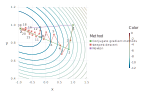

In [58]:
Conju_layer = Get_layer_fun_point(Conju_points,"#64ac58")
steepest_layer = Get_layer_fun_point(steepest_points,"#d56159")
Newton_layer = Get_layer_fun_point(Newton_points,"#a979c0")
plot(fun,Conju_layer, steepest_layer, Newton_layer,
    Guide.manual_color_key("Method",["Conjugate gradient methods", "steepest descent"," Newton"],["#64ac58","#d56159","#a979c0"]))